<a href="https://colab.research.google.com/github/Achint-7/Exploratory-Data-Analysis/blob/main/21BDS0190_EDA_Chapter6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#21BDS0190 ACHINT TRIPATHI  <BR> EXPLORATORY DATA ANALYSIS IMPLEMENTATION OF CHAPTER - 6 IN PYTHON  
<br> DATA SET USED : Lithium Ion Batteries <br> DATA SET LINK : https://github.com/salemprakash/EDA/blob/main/Data/lithium-ion%20batteries.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv'
df = pd.read_csv(url)
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [2]:
# Replace '?' with NaN in the entire dataset
df.replace('?', np.nan, inplace=True)

# Convert the relevant columns to numeric, forcing errors to NaN for non-numeric columns
numeric_columns_to_fill = [
    'Formation Energy (eV)',
    'E Above Hull (eV)',
    'Band Gap (eV)',
    'Nsites',
    'Density (gm/cc)',
    'Volume'
]

df[numeric_columns_to_fill] = df[numeric_columns_to_fill].apply(pd.to_numeric, errors='coerce')

# Convert the relevant columns to numeric, forcing errors to NaN for non-numeric columns
df[numeric_columns_to_fill] = df[numeric_columns_to_fill].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean for specific numeric columns
for column in numeric_columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)  # Fill NaN with mean in the specified columns

# Display the first few rows of the cleaned data
df.head()

<ipython-input-2-9c1eb7ffcf61>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)  # Fill NaN with mean in the specified columns


,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [3]:
# Selecting the numeric columns for dimensionality reduction
numeric_columns = df[['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume']]

# Standardize the data (important for MDS, PCA, and SVD)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

#Multidimensional Scaling (MDS)

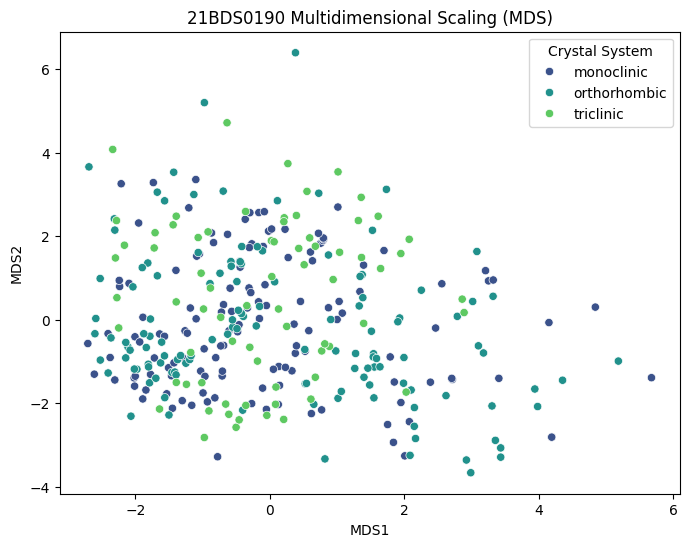

In [7]:
# Perform MDS
mds = MDS(n_components=2, random_state=42)
mds_transformed = mds.fit_transform(scaled_data)

# Create a DataFrame to hold the MDS results
df_mds = pd.DataFrame(mds_transformed, columns=['MDS1', 'MDS2'])

# Plot MDS results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_mds['MDS1'], y=df_mds['MDS2'], hue=df['Crystal System'], palette='viridis')
plt.title('21BDS0190 Multidimensional Scaling (MDS)')
plt.show()

#Principal Component Analysis (PCA)

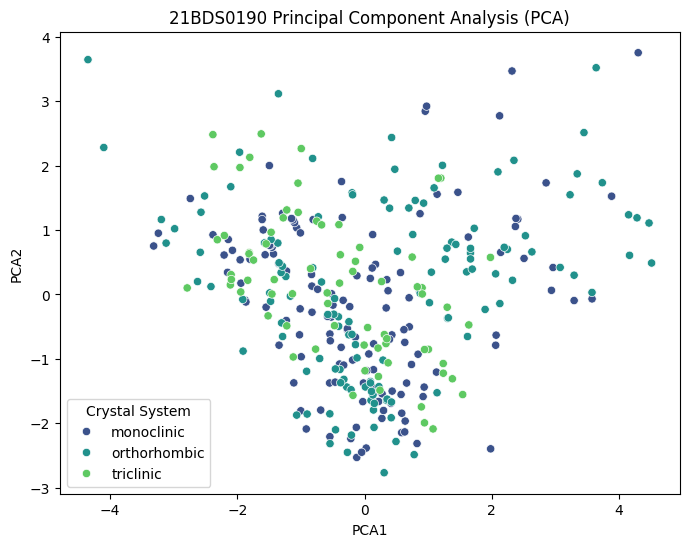

21BDS0190 Explained variance ratio (PCA): [0.41475487 0.27832886]


In [8]:
# Perform PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_data)

# Create a DataFrame to hold the PCA results
df_pca = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2'])

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df['Crystal System'], palette='viridis')
plt.title('21BDS0190 Principal Component Analysis (PCA)')
plt.show()

# Explained Variance Ratio
print(f'21BDS0190 Explained variance ratio (PCA): {pca.explained_variance_ratio_}')


#Singular Value Decomposition (SVD)

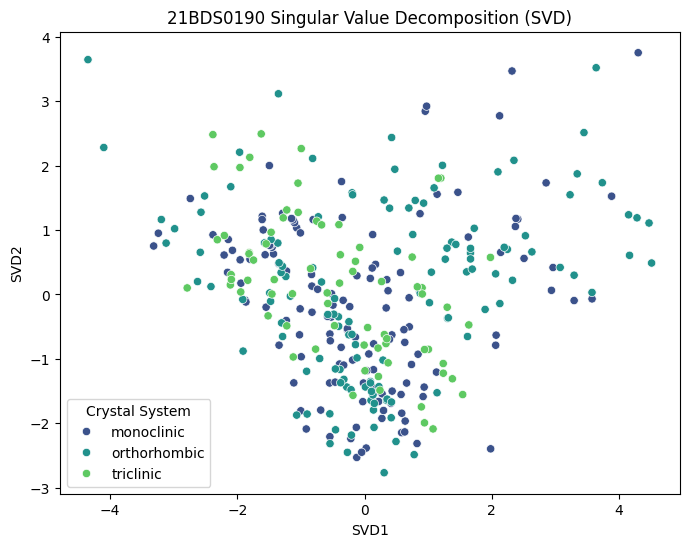

21BDS0190 Explained variance ratio (SVD): [0.41475487 0.27832886]


In [9]:
# Perform Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2)
svd_transformed = svd.fit_transform(scaled_data)

# Create a DataFrame to hold the SVD results
df_svd = pd.DataFrame(svd_transformed, columns=['SVD1', 'SVD2'])

# Plot SVD results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_svd['SVD1'], y=df_svd['SVD2'], hue=df['Crystal System'], palette='viridis')
plt.title('21BDS0190 Singular Value Decomposition (SVD)')
plt.show()

# Explained variance ratio
print(f'21BDS0190 Explained variance ratio (SVD): {svd.explained_variance_ratio_}')